In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers,Model
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array,load_img
from keras_preprocessing.image import ImageDataGenerator
from os import listdir, walk
from os.path import isfile, join
import matplotlib.pyplot as plt

In [63]:
from keras.utils.np_utils import to_categorical 

In [3]:
from keract import get_activations,display_activations

In [64]:
model = load_model('vgg19_final_1.h5', custom_objects={'leaky_relu': tf.nn.leaky_relu})

In [65]:
from keras.preprocessing import image
import cv2
from keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import preprocess_input
import pandas as pd
#model = load_model('vgg19-fullyconnected-lr0.001.h5', custom_objects={'leaky_relu': tf.nn.leaky_relu})

In [7]:
# !wget --no-check-certificate \
# https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
# -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
from PIL import Image
from tensorflow.keras.applications.vgg19 import preprocess_input

In [6]:
 from tensorflow.keras.applications.vgg19 import VGG19


local_weights_file = 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = VGG19(input_shape = (150, 150, 3), 
                                include_top = False,    
                                weights = None)

pre_trained_model.load_weights(local_weights_file)


for layer in pre_trained_model.layers:
    layer.trainable = False

In [7]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 4, 4, 512)


(2102, 1426, 3)

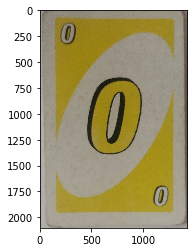

In [129]:
from PIL import Image
p = 'test_0.jpg'
image_test = Image.open(p)
nparr = np.array(image_test)
plt.imshow(nparr)
nparr.shape

In [66]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [68]:
train_dataframe = pd.read_csv('train_own.csv')
train_dataframe["images"]=train_dataframe["images"].apply(lambda x:x.split("_"))
# test_dataframe = pd.read_csv('validation_labels.csv')
# test_dataframe["images"]=test_dataframe["images"].apply(lambda x:x.split("_"))

In [69]:
train_dataframe.head()

,Filepath,images
0,testing_own/blue_0/_0_1065.jpg,"[blue, 0]"
1,testing_own/blue_0/_0_1124.jpg,"[blue, 0]"
2,testing_own/blue_0/_0_1177.jpg,"[blue, 0]"
3,testing_own/blue_0/_0_1188.jpg,"[blue, 0]"
4,testing_own/blue_0/_0_1189.jpg,"[blue, 0]"


In [71]:
train_generator=datagen.flow_from_dataframe(
dataframe=train_dataframe[:],
directory="",
x_col="Filepath",
y_col="images",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
# classes=['red','blue','green','yellow','0','1','2','3','4','5','6','7','8','9','plustwo','plusfour','wild'],
target_size=(150,150))

# valid_generator=test_datagen.flow_from_dataframe(
# dataframe=test_dataframe[:],
# directory="generated_image/",
# x_col="filepath",
# y_col="images",
# batch_size=32,
# seed=42,
# shuffle=True,
# class_mode="categorical",
# #classes=["desert", "mountains", "sea", "sunset", "trees"],
# target_size=(150,150))

Found 13371 validated image filenames belonging to 19 classes.


In [72]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [73]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'blue': 10,
 'green': 11,
 'plusfour': 12,
 'plustwo': 13,
 'red': 14,
 'reverse': 15,
 'skip': 16,
 'wild': 17,
 'yellow': 18}

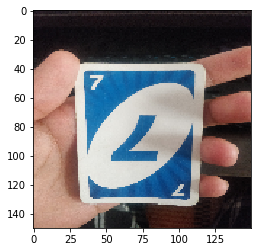

['0', '1', 'blue', 'plusfour', 'plustwo', 'wild']


In [85]:
img = cv2.imread('blue_7.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.resize(img, dsize=(150,150))
res = res.transpose(0,1,2)
for i in range(0,1):
    image  = res
    pred = model.predict(np.expand_dims(image, axis=0))
    plt.imshow(image)
    plt.show()     


#print([rev_index[i] for i in range(19) if y[0][i]==1])
print([rev_index[i] for i in range(19) if pred[0][i]==1])

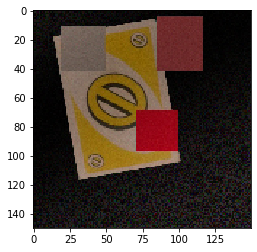

['skip', 'yellow']
['plustwo', 'yellow']


In [91]:
x,y = valid_generator.next()
for i in range(0,1):
    image = x[0]
    pred = model.predict(np.expand_dims(image, axis=0))
    plt.imshow(image.transpose(0,1,2))
    plt.show()


print([rev_index[i] for i in range(19) if y[0][i]==1])
print([rev_index[i] for i in range(19) if pred[0][i]==1])

In [211]:
model.save('vgg19_final_1.h5')

In [14]:
# Created a Custom Model

x = layers.Flatten()(last_output)

x = layers.Dense(4096, activation=tf.nn.leaky_relu)(x)

x = layers.Dropout(0.2)(x)        

x = layers.Dense(1024,  activation = tf.nn.leaky_relu)(x)

x =  layers.Dropout(0.25)(x)

x = layers.Dense(512,  activation = tf.nn.leaky_relu)(x)

# sigmoid layer for classification (0-9 10 classes)
x = layers.Dense  (19, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 



In [74]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), 
              loss = "binary_crossentropy", 
              metrics = ['acc'])


model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [75]:
#Custom Callback Function
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.96):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [76]:
accu = myCallback()
callback = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=3)
hisroty = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5,
                    callbacks = [callback,accu]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 417 steps, validate for 84 steps
Epoch 1/5
417/417 [==============================] - 505s 1s/step - loss: 150.2457 - acc: 0.9476 - val_loss: 377.7253 - val_acc: 0.8876
Epoch 2/5
416/417 [============================>.] - ETA: 0s - loss: 78.7516 - acc: 0.9760
Reached 90% accuracy so cancelling training!
417/417 [==============================] - 265s 635ms/step - loss: 79.6183 - acc: 0.9760 - val_loss: 3351.4004 - val_acc: 0.8569


In [115]:
valid_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'blue': 10,
 'green': 11,
 'plusfour': 12,
 'plustwo': 13,
 'red': 14,
 'reverse': 15,
 'skip': 16,
 'wild': 17,
 'yellow': 18}

In [77]:
model.save('vgg19-final_2-training_own.h5')

[]

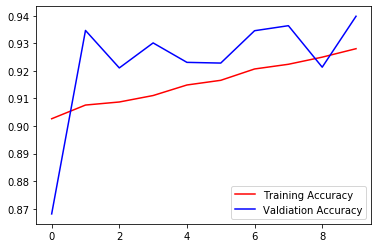

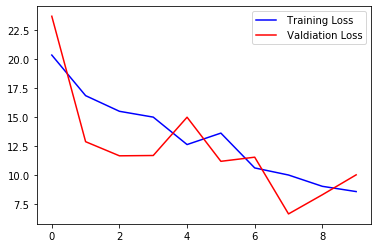

In [98]:
#UPDATED TRAINING IMAGES
#Transfer Learning on VGG19. LAYERS FREEZED AND FINAL LAYER TRAINED FOR !00 EPOCHS. LEARNING RATE AT 0.001

import matplotlib.pyplot as plt
acc = hisroty.history['acc']
val_acc = hisroty.history['val_acc']
#val_acc = history.history['val_accuracy']
loss = hisroty.history['loss']
#val_loss = history.history['val_loss']
val_loss = hisroty.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valdiation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'b', label = ' Training Loss' )
plt.plot(epochs, val_loss, 'r', label = ' Valdiation Loss' )
plt.legend(loc=0)
plt.plot()
#model.summary()
#model.save('vgg_fully_connected_lr0.02_v2_newimages.h5')

In [30]:
path = 'test_0.jpg'
img = load_img(path,target_size=(150,150))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images) 
print(classes)
print([rev_index[i] for i in range(19) if classes[0][i]==1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['blue']


[]

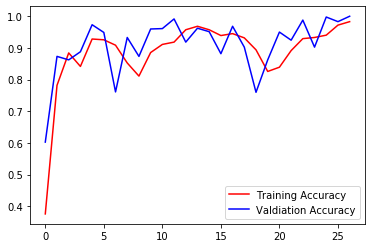

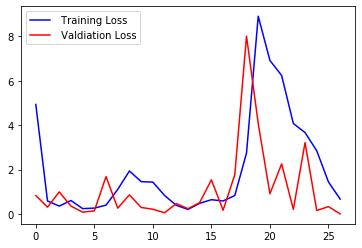

In [45]:
#Transfer Learning on VGG19. LAYERS FREEZED AND FINAL LAYER TRAINED FOR !00 EPOCHS. LEARNING RATE AT 0.002

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs,val_acc, 'b', label='Valdiation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'b', label = ' Training Loss' )
plt.plot(epochs, val_loss, 'r', label = ' Valdiation Loss' )
plt.legend(loc=0)
plt.plot()
#model.summary()
#model.save('vgg_fully_connected_lr0.02_v1.h5')

In [18]:
#CREATING A REVERSE INDEX
rev_index = {}
for items in train_generator.class_indices.items() :
  rev_index[items[1]] = items[0]
print(rev_index)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'blue', 11: 'green', 12: 'plusfour', 13: 'plustwo', 14: 'red', 15: 'reverse', 16: 'skip', 17: 'wild', 18: 'yellow'}


In [19]:
#TESTING IMAGES
path = 'generated_image/blue_0/blue_0_50.jpg'
sample_image = cv2.imread(path)#(valid_df.iloc[idx]['image'])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (150,150))
#sample_label = valid_df.iloc[idx]["label"]
# pre-process the image
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)
classes = model.predict(images) 
print(classes)
#print(c, rev_index[c])

NameError: name 'images' is not defined

In [108]:
#VISUALIZING THE CNN
outputs = [layer.output for layer in model.layers[1:18]]

# Define a new model that generates the above output
vis_model = Model(model.input, outputs)

# check if we have all the layers we require for visualization 
vis_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [30]:
layer_names = []
for layer in outputs:
    layer_names.append(layer.name.split("/")[0])

    
print("Layers going to be used for visualization: ")
print(layer_names)

Layers going to be used for visualization: 
['block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block4_pool', 'block5_conv1']


In [31]:
def get_CAM(processed_image, predicted_label):
    """
    This function is used to generate a heatmap for a sample image prediction.
    
    Args:
        processed_image: any sample image that has been pre-processed using the 
                       `preprocess_input()`method of a keras model
        predicted_label: label that has been predicted by the network for this image
    
    Returns:
        heatmap: heatmap generated over the last convolution layer output 
    """
    # we want the activations for the predicted label
    predicted_output = model.output[:, predicted_label]
    
    # choose the last conv layer in your model
    last_conv_layer = model.get_layer('block5_conv1')
    
    # get the gradients wrt to the last conv layer
    grads = K.gradients(predicted_output, last_conv_layer.output)[0]
    
    # take mean gradient per feature map
    grads = K.mean(grads, axis=(0,1,2))
    
    # Define a function that generates the values for the output and gradients
    evaluation_function = K.function([model.input], [grads, last_conv_layer.output[0]])
    
    # get the values
    grads_values, conv_ouput_values = evaluation_function([processed_image])
    
    # iterate over each feature map in yout conv output and multiply
    # the gradient values with the conv output values. This gives an 
    # indication of "how important a feature is"
    for i in range(512): # we have 512 features in our last conv layer
        conv_ouput_values[:,:,i] *= grads_values[i]
    
    # create a heatmap
    heatmap = np.mean(conv_ouput_values, axis=-1)
    
    # remove negative values
    heatmap = np.maximum(heatmap, 0)
    
    # normalize
    heatmap /= heatmap.max()
    
    return heatmap

In [112]:
#SMALL AREAS LIGHTUP IN SOME IMAGES
path1 = 'green_7.jpg'
img =load_img(path1,target_size=(150,150))
classes = model.predict(img) 
pred_label = classes
print([rev_index[i] for i in range(19) if classes[0][i]==1])

#sample_label = valid_df.iloc[idx]["label"]

# pre-process the image
sample_image_processed = img

# generate activation maps from the intermediate layers using the visualization model
activations = vis_model.predict(sample_image_processed)

# get the label predicted by our original model
# pred_label = np.argmax(model.predict(sample_image_processed), axis=-1)[0]
# print(model.predict(sample_image_processed))
# choose any random activation map from the activation maps 
sample_activation = activations[0][0,:,:,32]

# normalize the sample activation map
sample_activation-=sample_activation.mean()
sample_activation/=sample_activation.std()

# convert pixel values between 0-255
sample_activation *=255
sample_activation = np.clip(sample_activation, 0, 255).astype(np.uint8)



# get the heatmap for class activation map(CAM)
heatmap = get_CAM(sample_image_processed, pred_label)
heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
print((sample_image.shape[0], sample_image.shape[1]))
heatmap = heatmap *255
heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
f,ax = plt.subplots(2,2, figsize=(15,8))
ax[1,0].imshow(heatmap)
ax[1,0].set_title("Class Activation Map")
ax[1,0].axis('off')
super_imposed_image = heatmap * 0.5 + sample_image
super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
ax[0,0].imshow(sample_image)
ax[0,0].set_title("True label: 7 \n Predicted label:")
ax[0,0].axis('off')

ax[0,1].imshow(sample_activation)
ax[0,1].set_title("Random feature map")
ax[0,1].axis('off')


ax[1,1].imshow(super_imposed_image)
ax[1,1].set_title("Activation map superimposed")
ax[1,1].axis('off')
plt.show()
# print(model.predict(sample_image_processed))

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

In [65]:
#VISUALIZING EACH FEATURE MAP. TO CHECK IF ACTIVATION LAYER IS NOT WORKING
sample_image = cv2.imread(path)#(valid_df.iloc[idx]['image'])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (150,150))
#sample_label = valid_df.iloc[idx]["label"]

# pre-process the image
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)
activations = get_activations(model, sample_image_processed,'block5_conv1')

block5_conv1 (1, 9, 9, 512) 


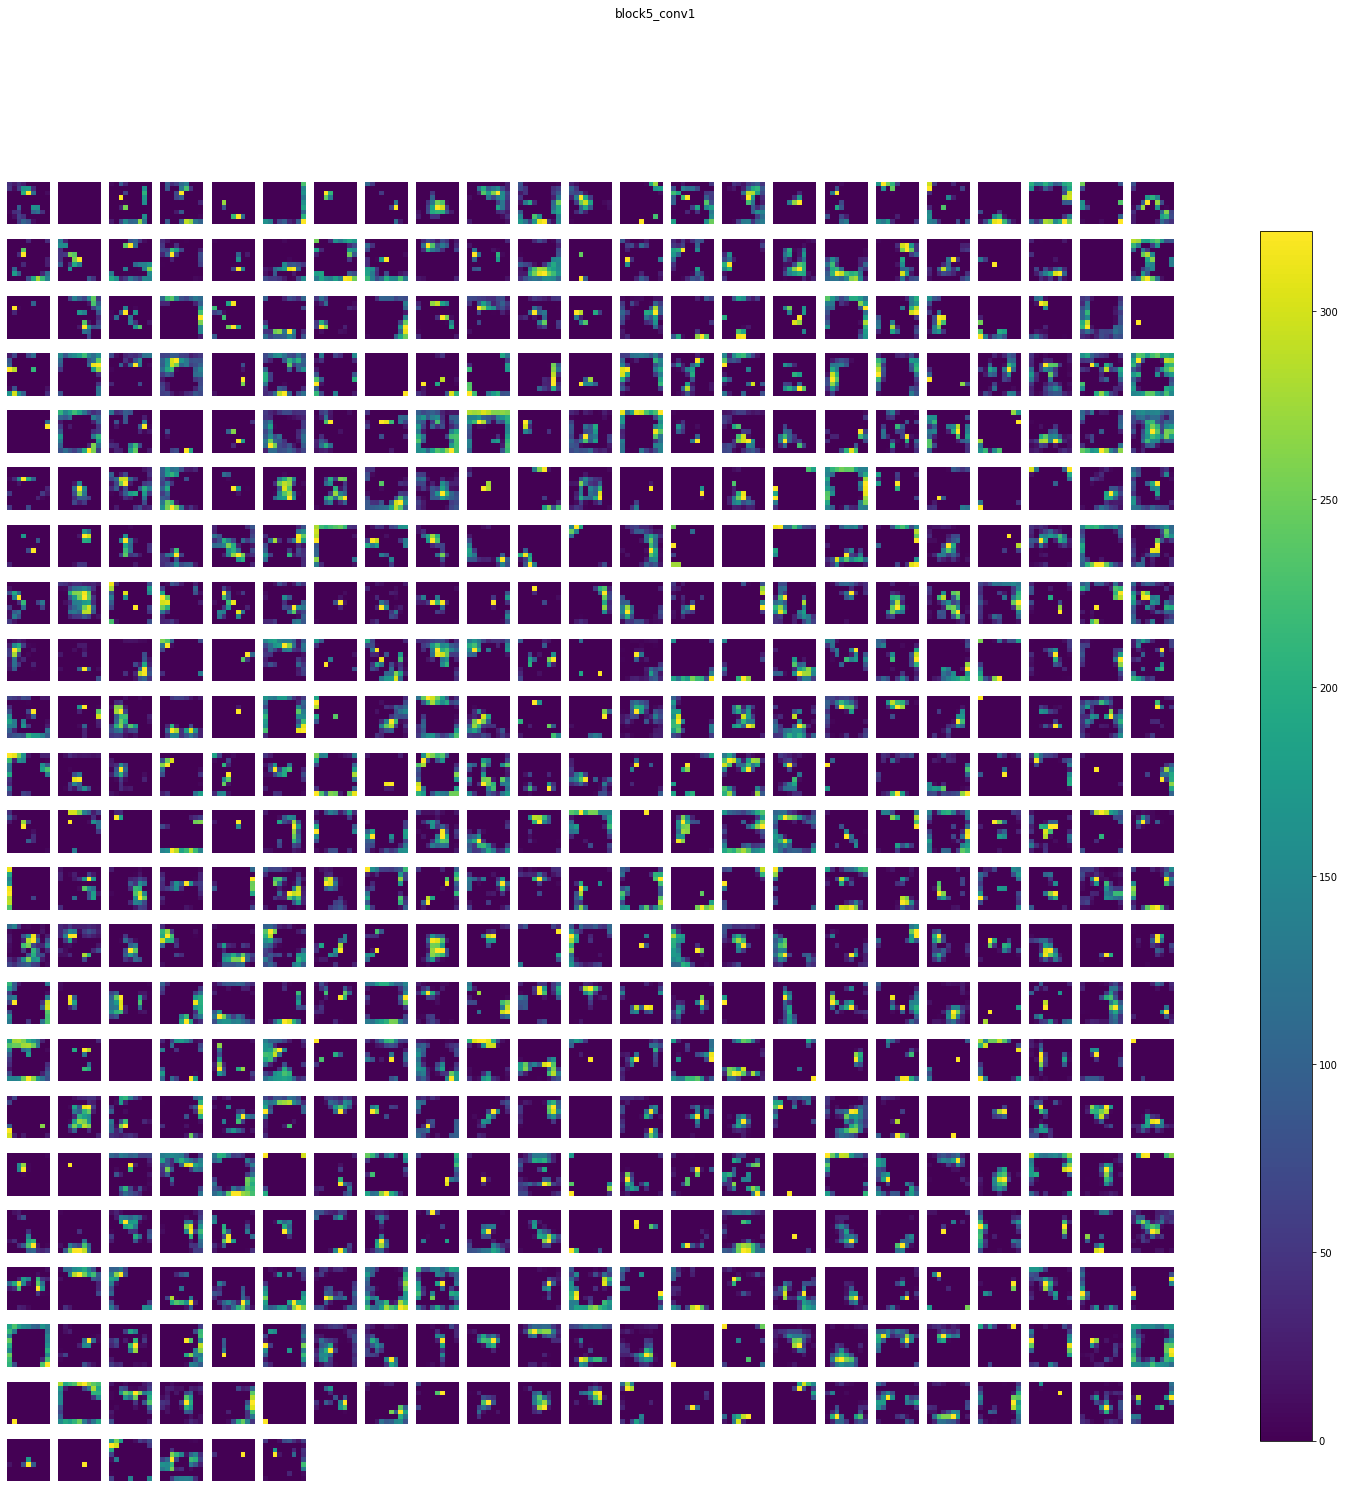

In [66]:
display_activations(activations, save=False)